In [26]:
import tensorflow
import numpy as np
import os
import keras
import random
import cv2
import math


from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import ConvNeXtSmall
from tensorflow.keras.applications.convnext import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")


In [27]:
print("Tensorflow-version:", tensorflow.__version__)

Tensorflow-version: 2.10.0


In [28]:
model_d=ConvNeXtSmall(weights='imagenet',include_top=False, input_shape=(128, 128, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(9,activation='softmax')(x) #FC-layer

In [29]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 convnext_small_prestem_normali  (None, 128, 128, 3)  0          ['input_3[0][0]']                
 zation (Normalization)                                                                           
                                                                                                  
 convnext_small_stem (Sequentia  (None, 32, 32, 96)  4896        ['convnext_small_prestem_normaliz
 l)                                                              ation[0][0]']              

 convnext_small_stage_0_block_2  (None, 32, 32, 96)  0           ['convnext_small_stage_0_block_2_
 _identity (Activation)                                          layer_scale[0][0]']              
                                                                                                  
 tf.__operators__.add_74 (TFOpL  (None, 32, 32, 96)  0           ['tf.__operators__.add_73[0][0]',
 ambda)                                                           'convnext_small_stage_0_block_2_
                                                                 identity[0][0]']                 
                                                                                                  
 convnext_small_downsampling_bl  (None, 16, 16, 192)  74112      ['tf.__operators__.add_74[0][0]']
 ock_0 (Sequential)                                                                               
                                                                                                  
 convnext_

 _identity (Activation)                                          layer_scale[0][0]']              
                                                                                                  
 tf.__operators__.add_77 (TFOpL  (None, 16, 16, 192)  0          ['tf.__operators__.add_76[0][0]',
 ambda)                                                           'convnext_small_stage_1_block_2_
                                                                 identity[0][0]']                 
                                                                                                  
 convnext_small_downsampling_bl  (None, 8, 8, 384)   295680      ['tf.__operators__.add_77[0][0]']
 ock_1 (Sequential)                                                                               
                                                                                                  
 convnext_small_stage_2_block_0  (None, 8, 8, 384)   19200       ['convnext_small_downsampling_blo
 _depthwis

                                                                                                  
 tf.__operators__.add_80 (TFOpL  (None, 8, 8, 384)   0           ['tf.__operators__.add_79[0][0]',
 ambda)                                                           'convnext_small_stage_2_block_2_
                                                                 identity[0][0]']                 
                                                                                                  
 convnext_small_stage_2_block_3  (None, 8, 8, 384)   19200       ['tf.__operators__.add_80[0][0]']
 _depthwise_conv (Conv2D)                                                                         
                                                                                                  
 convnext_small_stage_2_block_3  (None, 8, 8, 384)   768         ['convnext_small_stage_2_block_3_
 _layernorm (LayerNormalization                                  depthwise_conv[0][0]']           
 )        

 convnext_small_stage_2_block_6  (None, 8, 8, 384)   19200       ['tf.__operators__.add_83[0][0]']
 _depthwise_conv (Conv2D)                                                                         
                                                                                                  
 convnext_small_stage_2_block_6  (None, 8, 8, 384)   768         ['convnext_small_stage_2_block_6_
 _layernorm (LayerNormalization                                  depthwise_conv[0][0]']           
 )                                                                                                
                                                                                                  
 convnext_small_stage_2_block_6  (None, 8, 8, 1536)  591360      ['convnext_small_stage_2_block_6_
 _pointwise_conv_1 (Dense)                                       layernorm[0][0]']                
                                                                                                  
 convnext_

 )                                                                                                
                                                                                                  
 convnext_small_stage_2_block_9  (None, 8, 8, 1536)  591360      ['convnext_small_stage_2_block_9_
 _pointwise_conv_1 (Dense)                                       layernorm[0][0]']                
                                                                                                  
 convnext_small_stage_2_block_9  (None, 8, 8, 1536)  0           ['convnext_small_stage_2_block_9_
 _gelu (Activation)                                              pointwise_conv_1[0][0]']         
                                                                                                  
 convnext_small_stage_2_block_9  (None, 8, 8, 384)   590208      ['convnext_small_stage_2_block_9_
 _pointwise_conv_2 (Dense)                                       gelu[0][0]']                     
          

 convnext_small_stage_2_block_1  (None, 8, 8, 1536)  0           ['convnext_small_stage_2_block_12
 2_gelu (Activation)                                             _pointwise_conv_1[0][0]']        
                                                                                                  
 convnext_small_stage_2_block_1  (None, 8, 8, 384)   590208      ['convnext_small_stage_2_block_12
 2_pointwise_conv_2 (Dense)                                      _gelu[0][0]']                    
                                                                                                  
 convnext_small_stage_2_block_1  (None, 8, 8, 384)   384         ['convnext_small_stage_2_block_12
 2_layer_scale (LayerScale)                                      _pointwise_conv_2[0][0]']        
                                                                                                  
 convnext_small_stage_2_block_1  (None, 8, 8, 384)   0           ['convnext_small_stage_2_block_12
 2_identit

                                                                                                  
 convnext_small_stage_2_block_1  (None, 8, 8, 384)   384         ['convnext_small_stage_2_block_15
 5_layer_scale (LayerScale)                                      _pointwise_conv_2[0][0]']        
                                                                                                  
 convnext_small_stage_2_block_1  (None, 8, 8, 384)   0           ['convnext_small_stage_2_block_15
 5_identity (Activation)                                         _layer_scale[0][0]']             
                                                                                                  
 tf.__operators__.add_93 (TFOpL  (None, 8, 8, 384)   0           ['tf.__operators__.add_92[0][0]',
 ambda)                                                           'convnext_small_stage_2_block_15
                                                                 _identity[0][0]']                
          

 8_identity (Activation)                                         _layer_scale[0][0]']             
                                                                                                  
 tf.__operators__.add_96 (TFOpL  (None, 8, 8, 384)   0           ['tf.__operators__.add_95[0][0]',
 ambda)                                                           'convnext_small_stage_2_block_18
                                                                 _identity[0][0]']                
                                                                                                  
 convnext_small_stage_2_block_1  (None, 8, 8, 384)   19200       ['tf.__operators__.add_96[0][0]']
 9_depthwise_conv (Conv2D)                                                                        
                                                                                                  
 convnext_small_stage_2_block_1  (None, 8, 8, 384)   768         ['convnext_small_stage_2_block_19
 9_layerno

                                                                                                  
 convnext_small_stage_2_block_2  (None, 8, 8, 384)   19200       ['tf.__operators__.add_99[0][0]']
 2_depthwise_conv (Conv2D)                                                                        
                                                                                                  
 convnext_small_stage_2_block_2  (None, 8, 8, 384)   768         ['convnext_small_stage_2_block_22
 2_layernorm (LayerNormalizatio                                  _depthwise_conv[0][0]']          
 n)                                                                                               
                                                                                                  
 convnext_small_stage_2_block_2  (None, 8, 8, 1536)  591360      ['convnext_small_stage_2_block_22
 2_pointwise_conv_1 (Dense)                                      _layernorm[0][0]']               
          

 5_layernorm (LayerNormalizatio                                  _depthwise_conv[0][0]']          
 n)                                                                                               
                                                                                                  
 convnext_small_stage_2_block_2  (None, 8, 8, 1536)  591360      ['convnext_small_stage_2_block_25
 5_pointwise_conv_1 (Dense)                                      _layernorm[0][0]']               
                                                                                                  
 convnext_small_stage_2_block_2  (None, 8, 8, 1536)  0           ['convnext_small_stage_2_block_25
 5_gelu (Activation)                                             _pointwise_conv_1[0][0]']        
                                                                                                  
 convnext_small_stage_2_block_2  (None, 8, 8, 384)   590208      ['convnext_small_stage_2_block_25
 5_pointwi

 )                                                                                                
                                                                                                  
 convnext_small_stage_3_block_1  (None, 4, 4, 3072)  2362368     ['convnext_small_stage_3_block_1_
 _pointwise_conv_1 (Dense)                                       layernorm[0][0]']                
                                                                                                  
 convnext_small_stage_3_block_1  (None, 4, 4, 3072)  0           ['convnext_small_stage_3_block_1_
 _gelu (Activation)                                              pointwise_conv_1[0][0]']         
                                                                                                  
 convnext_small_stage_3_block_1  (None, 4, 4, 768)   2360064     ['convnext_small_stage_3_block_1_
 _pointwise_conv_2 (Dense)                                       gelu[0][0]']                     
          

In [30]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 convnext_small_prestem_normali  (None, 128, 128, 3)  0          ['input_3[0][0]']                
 zation (Normalization)                                                                           
                                                                                                  
 convnext_small_stem (Sequentia  (None, 32, 32, 96)  4896        ['convnext_small_prestem_normaliz
 l)                                                              ation[0][0]']              

 convnext_small_stage_0_block_2  (None, 32, 32, 96)  0           ['convnext_small_stage_0_block_2_
 _identity (Activation)                                          layer_scale[0][0]']              
                                                                                                  
 tf.__operators__.add_74 (TFOpL  (None, 32, 32, 96)  0           ['tf.__operators__.add_73[0][0]',
 ambda)                                                           'convnext_small_stage_0_block_2_
                                                                 identity[0][0]']                 
                                                                                                  
 convnext_small_downsampling_bl  (None, 16, 16, 192)  74112      ['tf.__operators__.add_74[0][0]']
 ock_0 (Sequential)                                                                               
                                                                                                  
 convnext_

 _identity (Activation)                                          layer_scale[0][0]']              
                                                                                                  
 tf.__operators__.add_77 (TFOpL  (None, 16, 16, 192)  0          ['tf.__operators__.add_76[0][0]',
 ambda)                                                           'convnext_small_stage_1_block_2_
                                                                 identity[0][0]']                 
                                                                                                  
 convnext_small_downsampling_bl  (None, 8, 8, 384)   295680      ['tf.__operators__.add_77[0][0]']
 ock_1 (Sequential)                                                                               
                                                                                                  
 convnext_small_stage_2_block_0  (None, 8, 8, 384)   19200       ['convnext_small_downsampling_blo
 _depthwis

                                                                                                  
 tf.__operators__.add_80 (TFOpL  (None, 8, 8, 384)   0           ['tf.__operators__.add_79[0][0]',
 ambda)                                                           'convnext_small_stage_2_block_2_
                                                                 identity[0][0]']                 
                                                                                                  
 convnext_small_stage_2_block_3  (None, 8, 8, 384)   19200       ['tf.__operators__.add_80[0][0]']
 _depthwise_conv (Conv2D)                                                                         
                                                                                                  
 convnext_small_stage_2_block_3  (None, 8, 8, 384)   768         ['convnext_small_stage_2_block_3_
 _layernorm (LayerNormalization                                  depthwise_conv[0][0]']           
 )        

 convnext_small_stage_2_block_6  (None, 8, 8, 384)   19200       ['tf.__operators__.add_83[0][0]']
 _depthwise_conv (Conv2D)                                                                         
                                                                                                  
 convnext_small_stage_2_block_6  (None, 8, 8, 384)   768         ['convnext_small_stage_2_block_6_
 _layernorm (LayerNormalization                                  depthwise_conv[0][0]']           
 )                                                                                                
                                                                                                  
 convnext_small_stage_2_block_6  (None, 8, 8, 1536)  591360      ['convnext_small_stage_2_block_6_
 _pointwise_conv_1 (Dense)                                       layernorm[0][0]']                
                                                                                                  
 convnext_

 )                                                                                                
                                                                                                  
 convnext_small_stage_2_block_9  (None, 8, 8, 1536)  591360      ['convnext_small_stage_2_block_9_
 _pointwise_conv_1 (Dense)                                       layernorm[0][0]']                
                                                                                                  
 convnext_small_stage_2_block_9  (None, 8, 8, 1536)  0           ['convnext_small_stage_2_block_9_
 _gelu (Activation)                                              pointwise_conv_1[0][0]']         
                                                                                                  
 convnext_small_stage_2_block_9  (None, 8, 8, 384)   590208      ['convnext_small_stage_2_block_9_
 _pointwise_conv_2 (Dense)                                       gelu[0][0]']                     
          

 convnext_small_stage_2_block_1  (None, 8, 8, 1536)  0           ['convnext_small_stage_2_block_12
 2_gelu (Activation)                                             _pointwise_conv_1[0][0]']        
                                                                                                  
 convnext_small_stage_2_block_1  (None, 8, 8, 384)   590208      ['convnext_small_stage_2_block_12
 2_pointwise_conv_2 (Dense)                                      _gelu[0][0]']                    
                                                                                                  
 convnext_small_stage_2_block_1  (None, 8, 8, 384)   384         ['convnext_small_stage_2_block_12
 2_layer_scale (LayerScale)                                      _pointwise_conv_2[0][0]']        
                                                                                                  
 convnext_small_stage_2_block_1  (None, 8, 8, 384)   0           ['convnext_small_stage_2_block_12
 2_identit

                                                                                                  
 convnext_small_stage_2_block_1  (None, 8, 8, 384)   384         ['convnext_small_stage_2_block_15
 5_layer_scale (LayerScale)                                      _pointwise_conv_2[0][0]']        
                                                                                                  
 convnext_small_stage_2_block_1  (None, 8, 8, 384)   0           ['convnext_small_stage_2_block_15
 5_identity (Activation)                                         _layer_scale[0][0]']             
                                                                                                  
 tf.__operators__.add_93 (TFOpL  (None, 8, 8, 384)   0           ['tf.__operators__.add_92[0][0]',
 ambda)                                                           'convnext_small_stage_2_block_15
                                                                 _identity[0][0]']                
          

 8_identity (Activation)                                         _layer_scale[0][0]']             
                                                                                                  
 tf.__operators__.add_96 (TFOpL  (None, 8, 8, 384)   0           ['tf.__operators__.add_95[0][0]',
 ambda)                                                           'convnext_small_stage_2_block_18
                                                                 _identity[0][0]']                
                                                                                                  
 convnext_small_stage_2_block_1  (None, 8, 8, 384)   19200       ['tf.__operators__.add_96[0][0]']
 9_depthwise_conv (Conv2D)                                                                        
                                                                                                  
 convnext_small_stage_2_block_1  (None, 8, 8, 384)   768         ['convnext_small_stage_2_block_19
 9_layerno

                                                                                                  
 convnext_small_stage_2_block_2  (None, 8, 8, 384)   19200       ['tf.__operators__.add_99[0][0]']
 2_depthwise_conv (Conv2D)                                                                        
                                                                                                  
 convnext_small_stage_2_block_2  (None, 8, 8, 384)   768         ['convnext_small_stage_2_block_22
 2_layernorm (LayerNormalizatio                                  _depthwise_conv[0][0]']          
 n)                                                                                               
                                                                                                  
 convnext_small_stage_2_block_2  (None, 8, 8, 1536)  591360      ['convnext_small_stage_2_block_22
 2_pointwise_conv_1 (Dense)                                      _layernorm[0][0]']               
          

 5_layernorm (LayerNormalizatio                                  _depthwise_conv[0][0]']          
 n)                                                                                               
                                                                                                  
 convnext_small_stage_2_block_2  (None, 8, 8, 1536)  591360      ['convnext_small_stage_2_block_25
 5_pointwise_conv_1 (Dense)                                      _layernorm[0][0]']               
                                                                                                  
 convnext_small_stage_2_block_2  (None, 8, 8, 1536)  0           ['convnext_small_stage_2_block_25
 5_gelu (Activation)                                             _pointwise_conv_1[0][0]']        
                                                                                                  
 convnext_small_stage_2_block_2  (None, 8, 8, 384)   590208      ['convnext_small_stage_2_block_25
 5_pointwi

 )                                                                                                
                                                                                                  
 convnext_small_stage_3_block_1  (None, 4, 4, 3072)  2362368     ['convnext_small_stage_3_block_1_
 _pointwise_conv_1 (Dense)                                       layernorm[0][0]']                
                                                                                                  
 convnext_small_stage_3_block_1  (None, 4, 4, 3072)  0           ['convnext_small_stage_3_block_1_
 _gelu (Activation)                                              pointwise_conv_1[0][0]']         
                                                                                                  
 convnext_small_stage_3_block_1  (None, 4, 4, 768)   2360064     ['convnext_small_stage_3_block_1_
 _pointwise_conv_2 (Dense)                                       gelu[0][0]']                     
          

In [31]:
data=[]
labels=[]
random.seed(42)
imagePaths = sorted(list(os.listdir("collected_images//")))
#print(imagePaths)
random.shuffle(imagePaths)


for img in imagePaths:
    path=sorted(list(os.listdir("collected_images/"+img)))
    for i in path:
        image = cv2.imread("collected_images/"+img+'/'+i)
        #print(image.dtype)
        image = cv2.resize(image, (128,128))
        image = img_to_array(image)
        #print(image.shape)
        data.append(image)
        l = label = img
        labels.append(l)
print(labels)

['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Thanks', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women', 'Women

In [32]:
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)
mlb = LabelBinarizer()
labels = mlb.fit_transform(labels)
print(labels[0])

[0 0 0 1 0 0 0 0 0]


In [33]:
(xtrain,xtest,ytrain,ytest)=train_test_split(data,labels,test_size=0.4,random_state=42)
print(xtrain.shape, xtest.shape)

(245, 128, 128, 3) (164, 128, 128, 3)


In [34]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model_c.h5', verbose=1, save_best_only=True)

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)


datagen.fit(xtrain)
# Fits-the-model
history = model.fit(datagen.flow(xtrain, ytrain, batch_size=15),
               steps_per_epoch=xtrain.shape[0] //15,
               epochs=50,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(xtrain, ytrain))

Epoch 1/50

Epoch 1: val_loss improved from inf to 2.62602, saving model to model_c.h5
16/16 - 185s - loss: 2.0664 - accuracy: 0.4391 - val_loss: 2.6260 - val_accuracy: 0.1347 - lr: 0.0010 - 185s/epoch - 12s/step
Epoch 2/50

Epoch 2: val_loss did not improve from 2.62602
16/16 - 164s - loss: 1.0416 - accuracy: 0.7087 - val_loss: 3.0677 - val_accuracy: 0.1347 - lr: 0.0010 - 164s/epoch - 10s/step
Epoch 3/50

Epoch 3: val_loss did not improve from 2.62602
16/16 - 161s - loss: 0.9958 - accuracy: 0.7000 - val_loss: 2.9001 - val_accuracy: 0.1347 - lr: 0.0010 - 161s/epoch - 10s/step
Epoch 4/50

Epoch 4: val_loss improved from 2.62602 to 2.51305, saving model to model_c.h5
16/16 - 164s - loss: 0.8420 - accuracy: 0.7609 - val_loss: 2.5130 - val_accuracy: 0.1633 - lr: 0.0010 - 164s/epoch - 10s/step
Epoch 5/50

Epoch 5: val_loss improved from 2.51305 to 2.23089, saving model to model_c.h5
16/16 - 164s - loss: 0.7661 - accuracy: 0.8043 - val_loss: 2.2309 - val_accuracy: 0.1837 - lr: 0.0010 - 164s/

16/16 - 186s - loss: 0.4411 - accuracy: 0.8609 - val_loss: 0.5853 - val_accuracy: 0.8449 - lr: 0.0010 - 186s/epoch - 12s/step
Epoch 42/50

Epoch 42: val_loss did not improve from 0.26412
16/16 - 184s - loss: 0.2963 - accuracy: 0.8913 - val_loss: 0.7869 - val_accuracy: 0.7837 - lr: 0.0010 - 184s/epoch - 12s/step
Epoch 43/50

Epoch 43: val_loss did not improve from 0.26412
16/16 - 182s - loss: 0.3713 - accuracy: 0.8826 - val_loss: 0.6804 - val_accuracy: 0.8245 - lr: 0.0010 - 182s/epoch - 11s/step
Epoch 44/50

Epoch 44: val_loss did not improve from 0.26412
16/16 - 185s - loss: 0.4667 - accuracy: 0.8609 - val_loss: 0.7355 - val_accuracy: 0.8367 - lr: 0.0010 - 185s/epoch - 12s/step
Epoch 45/50

Epoch 45: val_loss did not improve from 0.26412
16/16 - 184s - loss: 0.3101 - accuracy: 0.9087 - val_loss: 0.8481 - val_accuracy: 0.7673 - lr: 0.0010 - 184s/epoch - 11s/step
Epoch 46/50

Epoch 46: val_loss did not improve from 0.26412
16/16 - 184s - loss: 0.2721 - accuracy: 0.9130 - val_loss: 0.4492

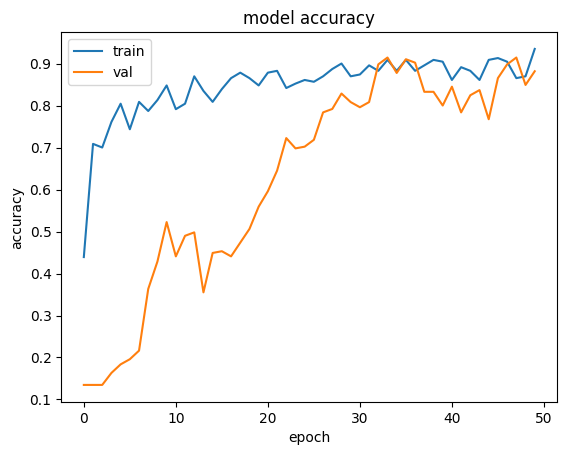

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

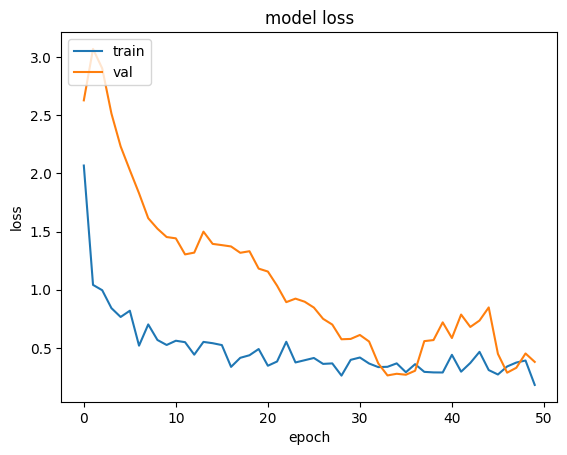

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
ypred = model.predict(xtest)

total = 0
accurate = 0
accurateindex = []
wrongindex = []
acc = []
for i in range(len(ypred)):
    if np.argmax(ypred[i]) == np.argmax(ytest[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    acc.append(accurate/total*100)
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

6/6 [==============================] - 69s 10s/step
Total-test-data; 164 	accurately-predicted-data: 140 	 wrongly-predicted-data:  24
Accuracy: 85.366 %


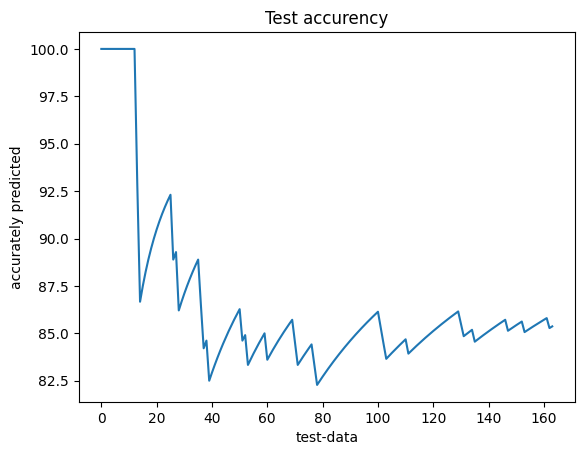

In [38]:
plt.plot(acc)
plt.plot(100)
plt.title('Test accurency')
plt.ylabel('accurately predicted')
plt.xlabel('test-data')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()

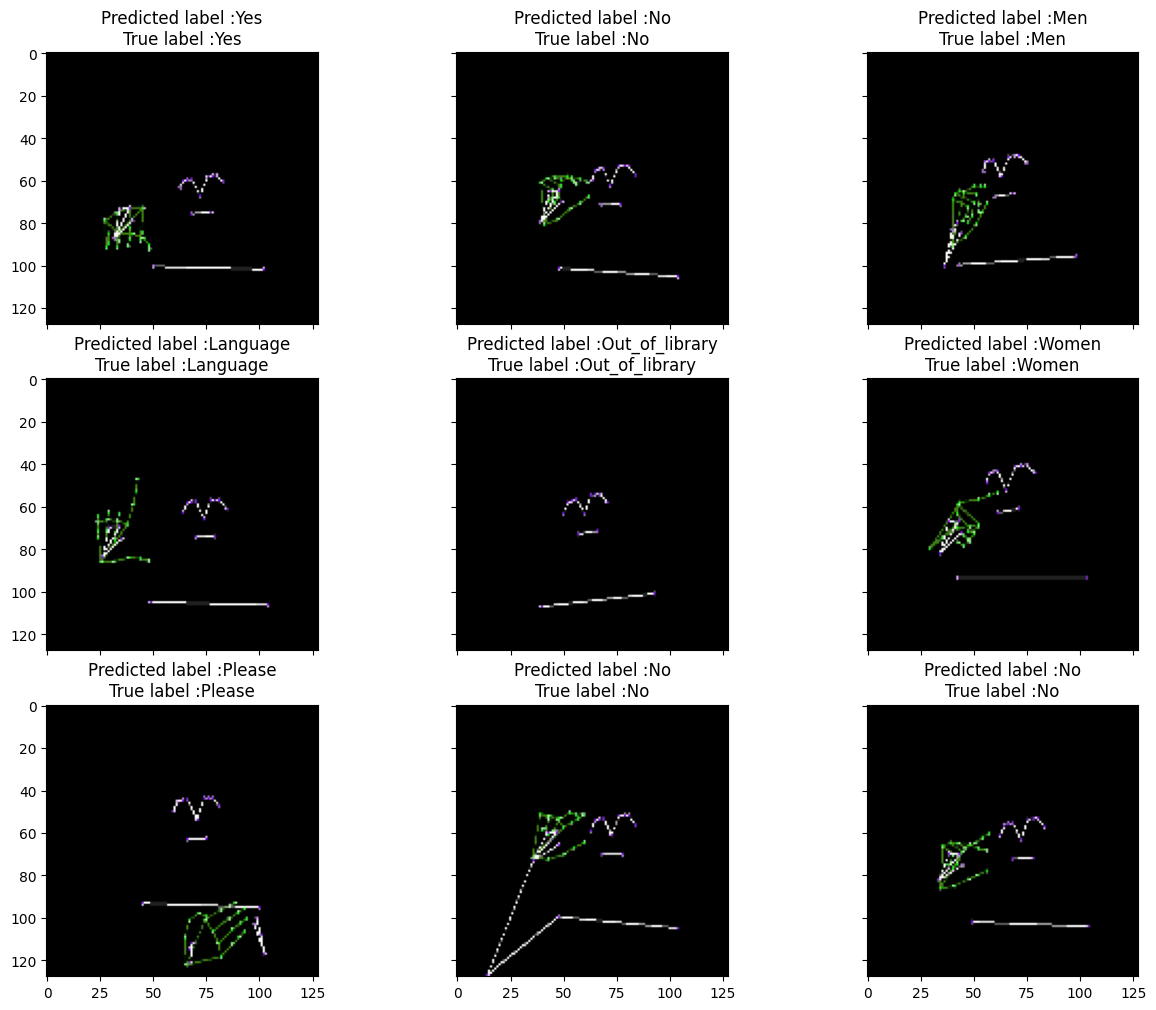

[141, 143, 132, 104, 56, 15, 76, 33, 18]


In [39]:
label=['Hello', 'Language', 'Men', 'No', 'Out_of_library', 'Please', 'Thanks','Women','Yes']
imidx = random.sample(accurateindex, k=9)# replace with 'wrongindex'

nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15, 12))

n = 0
for row in range(nrows):
    for col in range(ncols):
            ax[row,col].imshow(xtest[imidx[n]])
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(label[np.argmax(ypred[imidx[n]])], label[np.argmax(ytest[imidx[n]])]))
            n += 1

plt.show()
print(imidx)

6/6 [==============================] - 62s 10s/step


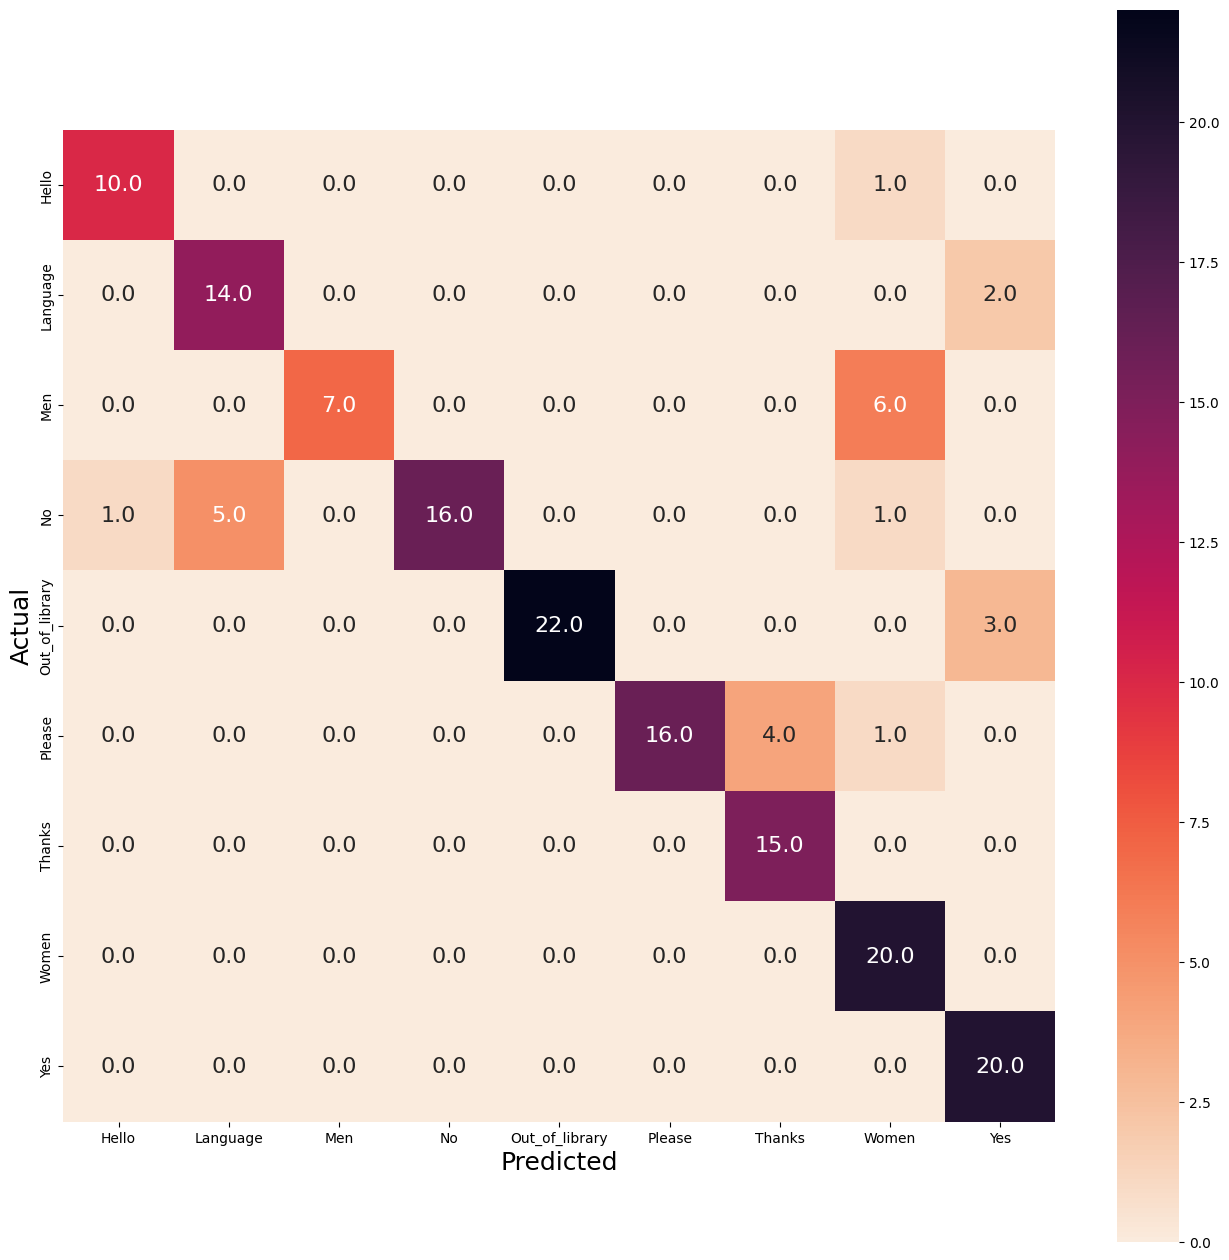

In [40]:
Ypred = model.predict(xtest)

Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(ytest, axis=1)

cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(16, 16))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=18)
ax.set_xlabel('Predicted', fontsize=18)
plt.show()


In [42]:
#from tensorflow.keras.models import Model
#from keras.models import load_model
#model = load_model('model_c.h5')
pred=[]
image_1=cv2.imread("Thanks-Copy1.308abcca-6162-11ed-a2a3-cbb402ac3162.jpg")
image_1 = cv2.resize(image_1, (128,128))
image_1 = img_to_array(image_1)
pred.append(image_1)
pred = np.array(pred, dtype="float32") / 255.0
result_1=model.predict(pred)

1/1 [==============================] - 1s 1s/step


In [43]:

#imidx = random.sample(accurateindex, k=9)# replace with 'wrongindex'
#print(imidx)

nrows = 1
ncols = 1
#fig, ax = plt.plot(pred[0],sharex=True,sharey=True,figsize=(5, 4))
print("Predicted label :{}\n".format(label[np.argmax(result_1[0])]))
n = 0
#for row in range(nrows):
    #for col in range(ncols):
            #a[0].imshow(pred[0])
 #           n += 1

Predicted label :Thanks



In [44]:
print(imidx)

[141, 143, 132, 104, 56, 15, 76, 33, 18]


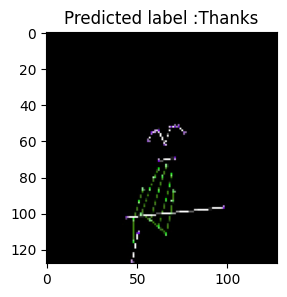

In [45]:
fig, ax = plt.subplots(figsize=(4, 3))

n = 0
img=ax.imshow(pred[0])
ax.set_title("Predicted label :{}".format(label[np.argmax(result_1[0])]))
    
plt.show()

In [46]:
print("Predicted label :{}\n ".format(label[np.argmax(result_1[0])]))


Predicted label :Thanks
 


In [47]:
cv2.destroyAllWindows()

In [ ]:
#import cv2
#import numpy as np
import mediapipe as mp
import time
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_CONTOURS

mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
import numpy as np
from tensorflow.keras.models import Model
from keras.models import load_model
#model = load_model('model_c.h5')


label=['Hello', 'Language', 'Men', 'No', 'Out_of_library', 'Please', 'Thanks','Women', 'Yes']
# reading the input using the camera



font = cv2.FONT_HERSHEY_SIMPLEX
n=0
si_la=''


cap = cv2.VideoCapture(0)
# Se toma el ancho y alto del video
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# Se crea el formato del nuevo video.
#output = cv2.VideoWriter('kjs.jpg',cv2.VideoWriter_fourcc('M','J','P','G'), 30, (width,height))
# Initialize holistic model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        # Read frame
        pred_1=[]
        if n>12:
            si_la=''
        n+=1
        ret, frame = cap.read()
        if ret == True:
            img = np.zeros((frame.shape[0], frame.shape[1], frame.shape[2]))
            # Resize frame
            #frame = cv2.resize(frame, (WIDTH, HEIGHT), interpolation = cv2.INTER_AREA)
            # Change color from BGR to RGB
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame.flags.writeable = False
            # Detect landmarks
            results = holistic.process(frame)
            # Left hand (azul)
            mp_drawing.draw_landmarks(
                img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(255, 255, 0), thickness=2, circle_radius=1),
                mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2))
            #print(img)


            # Right hand (verde)
            mp_drawing.draw_landmarks(
                img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=1),
                mp_drawing.DrawingSpec(color=(57, 143, 0), thickness=2))
            #print(img)

            # Pose
            mp_drawing.draw_landmarks(
                img, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(128, 0, 255), thickness=2, circle_radius=1),
                mp_drawing.DrawingSpec(color=(255, 255, 255), thickness=2))
                #print(img)

            frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
            frame=cv2.putText(frame,si_la, (200,450), font, 3,(0,0,255),2,cv2.LINE_AA)
            cv2.imshow("Frame", frame) 
            #cv2.imshow("Black", img)
            if cv2.waitKey(1) & 0xFF == ord('s'):
                cv2.imwrite('black.jpg', img)
                image_1=cv2.imread("black.jpg")
                img__=image_1.copy()
                image_1 = cv2.resize(image_1, (128, 128))
                image_1 = img_to_array(image_1)
                pred_1.append(image_1)
                pred_1 = np.array(pred_1, dtype="float32") / 255.0
                #image_1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                #cv2.imshow("prediction", image_1)
                result_2=model.predict(pred_1)
                si_la = label[np.argmax(result_2)]
                print(result_2)
                print(si_la)
                n=0        
           
            #output.write(img)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
        else:
            break
cap.release()

1/1 [==============================] - 1s 852ms/step
[[0.00156757 0.00916448 0.00092474 0.06331107 0.82390314 0.07015509
  0.01214906 0.0179393  0.00088566]]
Out_of_library
1/1 [==============================] - 1s 881ms/step
[[1.7277847e-07 1.2222000e-07 4.1168510e-06 2.0713464e-06 2.8366558e-05
  9.9712509e-01 2.6570607e-03 1.5227457e-04 3.0809788e-05]]
Please
1/1 [==============================] - 1s 601ms/step
[[4.5542399e-07 1.8564585e-06 1.4857930e-06 6.1111656e-05 1.7950771e-04
  3.4391146e-02 8.7602383e-01 8.6799964e-02 2.5407302e-03]]
Thanks
1/1 [==============================] - 1s 801ms/step
[[6.6723519e-06 4.5048000e-06 1.1898839e-03 1.2780420e-04 5.0819581e-03
  6.3081270e-01 3.5027808e-01 5.7412214e-03 6.7571714e-03]]
Please
1/1 [==============================] - 1s 801ms/step
[[4.94083069e-05 1.42675503e-06 3.29510937e-03 2.86075538e-05
  4.58350951e-05 3.52647249e-03 9.79560792e-01 1.33756837e-02
  1.16638745e-04]]
Thanks
1/1 [==============================] - 1s 811ms/

1/1 [==============================] - 1s 813ms/step
[[1.1477450e-05 1.9314086e-09 7.3578299e-08 4.1110208e-05 3.4116227e-05
  3.4989121e-08 2.6299471e-02 9.7254384e-01 1.0699027e-03]]
Women
1/1 [==============================] - 1s 802ms/step
[[6.3440120e-06 1.9061034e-07 9.3441443e-10 4.1751238e-04 3.7783834e-06
  1.0012735e-07 1.4919532e-02 9.8464692e-01 5.6693857e-06]]
Women
1/1 [==============================] - 1s 804ms/step
[[1.9573245e-02 9.2400986e-01 1.7569374e-04 2.9146789e-02 3.4820969e-04
  5.2442432e-05 1.4684943e-03 4.9508116e-03 2.0274557e-02]]
Language
1/1 [==============================] - 1s 802ms/step
[[9.8008366e-07 1.0265395e-09 2.4153433e-09 1.4136920e-03 3.0327728e-06
  3.5809883e-08 5.8289416e-02 9.4028473e-01 8.2077904e-06]]
Women
1/1 [==============================] - 1s 797ms/step
[[2.0844830e-02 3.9077035e-01 2.4407625e-05 6.9972351e-03 2.1157777e-05
  3.4691540e-03 1.4344584e-04 2.3756307e-02 5.5397314e-01]]
Yes
1/1 [==============================] - 1s 78